## Chapter 15: Calculus and automatic differentiation 

# 15.3  Derivative equations of elementary functions and operations

Using the definition of the derivative we will see in this Section that elementary mathematical functions and operations have derivatives that are also elementary functions and/or operations.  This somewhat remarkable fact is the foundation of automatic differentation, as we will see in the Section following this one.

In [1]:
# This code cell will not be shown in the HTML version of this notebook
#imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calclib
from mlrefined_libraries import basics_library as baslib

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## 15.3.1.  Derivative equations for elementary functions and operations

Somewhat amazingly, every elementary mathematical function and operation has a derivative that may also be expressed by elementary functions and operations.  In Tables 1 and 2 below we organize *derivative formulae for popular elementary functions* (Table 1) and *elementary operations* (Table 2).  These formulae can be verified by using the definition of the derivative given in equation (14) of the previous Section, as we show for a number of examples below.

<br>
<center>
    <caption>Table 1: Derivative formulae for elementary functions</caption>
</center>  
<table>
  <col width="180">
  <col width="100">
  <col width="100">
<thead>
<tr>
    <th>elementary function</th>
    <th>equation</th> 
    <th>derivative</th>
  </tr>
  </thead>
  <tbody>
    <tr>
    <td>constant</td>
    <td>$c$</td>
    <td>$0$</td>
  </tr>
  <tr>
    <td>monomial (degree $p\neq 0$)</td>
    <td>$w^p$</td>
    <td>$pw^{p-1}$</td>
  </tr>
    <tr>
    <td>sine</td>
    <td>$\text{sin}(w)$</td>
    <td>$\text{cos}(w)$</td>
  </tr>
  <tr>
    <td>cosine</td>
    <td>$\text{cos}(w)$</td>
    <td>$-\text{sin}(w)$</td>
  </tr>
  <tr>
    <td>exponential</td>
    <td>$e^w$</td>
    <td>$e^w$</td>
  </tr>
  <tr>
    <td>logarithm</td>
    <td>$\text{log}(w)$</td>
    <td>$\frac{1}{w}$</td>
  </tr>
    <tr>
    <td>hyperbloic tangent</td>
    <td>$\text{tanh}(w)$</td>
    <td>$1 - \text{tanh}^2(w)$</td>
  </tr>
      <tr>
    <td>rectified linear unit (ReLU) </td>
    <td>$\text{max}\left(0,w\right)$</td>
    <td>$\begin{cases}0 & w\leq0\\1 & w>0\end{cases}$</td>
  </tr>
  </tbody>
</table>

<br>
<center>
  <caption>Table 2: Derivative formulae for elementary operations</caption>
</center>
<table>
  <col width="820">
  <col width="180">
  <col width="650">
<thead>
<tr>
    <th>operation</th> 
    <th>equation</th>
    <th>derivative rule</th>    
  </tr>
  </thead>
  <tbody>
     <tr>
    <td> addition of a constant $c$ </td>
    <td> $g(w) + c$</td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}\left(g(w) + c\right)=  \frac{\mathrm{d}}{\mathrm{d}w}g(w)$</td>
  </tr> 
    <tr>
    <td> multiplication by a constant $c$ </td>
    <td> $cg(w)$</td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}\left(cg(w)\right)=  c\frac{\mathrm{d}}{\mathrm{d}w}g(w)$</td>
  </tr>  
  <tr>
  <td> addition of functions (often called the summation rule)</td>
    <td> $f(w) + g(w)$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(f(w) + g(w))=  \frac{\mathrm{d}}{\mathrm{d}w}f(w) + \frac{\mathrm{d}}{\mathrm{d}w}g(w)$</td>
  </tr> 
  <tr>
  <td> multiplication of functions (often called the product rule) </td>
    <td> $f(w)g(w)$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(f(w)\cdot g(w))=  \left(\frac{\mathrm{d}}{\mathrm{d}w}f(w)\right)\cdot g(w) + f(w)\cdot \left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)$
    </td>
  </tr>
  <tr>
  <td> composition of functions (often called the chain rule)</td>
    <td> $f(g(w))$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(f(g(w)))= \frac{\mathrm{d}}{\mathrm{d}g}f(g) \cdot \frac{\mathrm{d}}{\mathrm{d}w}g(w)$
  </td>
  </tr>
  <tr>
  <td> maximum of two functions </td>
    <td> $\text{max}(f(w),\,g(w))$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(\text{max}(f(w),\,g(w))) = \begin{cases}\frac{\mathrm{d}}{\mathrm{d}w}f\left(w\right) & \text{if}\,\,\,f\left(w\right)\geq g\left(w\right)\\\frac{\mathrm{d}}{\mathrm{d}w}g\left(w\right) & \text{otherwise}\end{cases}$</td>
  </tr> 
  </tbody>
</table>

Note again how the operation rules in Table 2 are for *generic functions*.  There are not two distinct rules telling one how to calculate the derivative formula for the sum of two polynomials, and the sum of two sinusoidal functions: there is just one rule for addition.  Likewise, there are not two rules telling one how to derive formula for the product of an exponential and a polynomial, and an sinusoid and a logarithm: there is only one rule for taking the derivative of a product of functions.  

Finally, note that the same formula apply to *partial derivatives* (of multi-input functions) as well.

#### <span style="color:#a50e3e;">Example 1. </span> Derivative of the constant function

Say our function $g(w) = c$ where $c$ is some constant (e.g., 1, -33.2, etc.,).  Let $\epsilon$ be some small magnitude number, then for a general point $w$

\begin{equation}
\frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{c - c}{\epsilon} = \frac{0}{\epsilon} = 0
\end{equation}

Neither the particular point $w$ nor the sign and magnitude of $\epsilon$ mattered above: the value is always equal to zero.  So here we have

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 0 
\end{equation}

#### <span style="color:#a50e3e;">Example 2. </span> Derivative a simple line

Take the simple line $g(w) = w$, then we have for general $w$ and small magnitude $\epsilon$

\begin{equation}
\frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{w + \epsilon - w}{\epsilon} = \frac{\epsilon}{\epsilon} = 1
\end{equation}

So here we have - again regardless of the magnitude and sign of $\epsilon$ - this value remains the same.  Hence the general derivative is given as

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w)= 1 
\end{equation}

#### <span style="color:#a50e3e;">Example 3. </span> Derivative of general monomial terms

Lets start with the degree two monomial $g(w) = w^2$, then we have for general $w$ and small magnitude $\epsilon$


\begin{equation}
\frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{(w + \epsilon)^2 - w^2}{\epsilon} = \frac{w^2 + 2w\epsilon + \epsilon^2 - w^2 }{\epsilon} = \frac{2w\epsilon + \epsilon^2}{\epsilon} = 2w + \epsilon
\end{equation}


With $\epsilon$ being infinitely small *it vanishes* from the line above, and we then have that


\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 2w 
\end{equation}


Next: lets look at the degree three monomial $g(w) = w^3$


\begin{equation}
\frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{(w + \epsilon)^3 - w^3}{\epsilon} = \frac{w^3 + 3w^2\epsilon + 3w\epsilon^2  + \epsilon^3 - w^3}{\epsilon} = 3w^2 + 3w\epsilon  + \epsilon
\end{equation}

 
For infinitely small magnitude $\epsilon$ only the $3w^2$ term remains.  Thus the derivative is 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 3w^2
\end{equation}


Now lets exmamine an arbitrary degree monomial term $g(w) = w^p$.  This argument works in a completely similar manner to the degree 2 case above: we just need to expand the term $(w + \epsilon)^p$ and re-arrange terms the right way.  Denoting the general binomial coeffecient (choose notation)

\begin{equation}
{{p}\choose{j}} = \frac{j!}{j!(p-j)!}
\end{equation}

the *Binomial Theorem* gives us this expansion as

\begin{equation}
(w + \epsilon)^{\,p} = \sum_{j=0}^p {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j} 
\end{equation}

Note that we can write this equivalently - pulling out the two highest degree terms in $w$ to make them explicit, leaving every other term in the sum multiplied by $\epsilon^2$ 

\begin{equation}
 = w^{\,p} + \epsilon \, pw^{\,p-1} + \epsilon^2\sum_{j=0}^{p-2} {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j - 2}
\end{equation}

Using this final form, and plugging it into the definition of the derivative we then have

\begin{equation}
\frac{\left(w + \epsilon \right)^{\,p} - w^{\,p}}{\epsilon} = \frac{ \left(w^{\,p} + \epsilon \, pw^{\,p-1} + \epsilon^2\sum_{j=0}^{p-2} {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j - 2} \right) - w^{\,p}}{\epsilon}
\end{equation}


\begin{equation}
=  pw^{\,p-1} + \epsilon\sum_{j=0}^{p-2} {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j - 2} 
\end{equation}

and then as $\epsilon \longrightarrow 0$ only the $pw^{\,p-1}$ term remains.

#### <span style="color:#a50e3e;">Example 4. </span> Derivative of the exponential function

With $g(w) = e^{w}$ we have from the definition of the derivative

\begin{equation}
\frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{ e^{w + \epsilon} - e^{w}}{\epsilon} = e^{w}\frac{e^{\epsilon} - 1}{\epsilon} = e^{w}
\end{equation}

Where the final equality follows from the fact that denoting $f(\epsilon) = \frac{e^{\epsilon} - 1}{\epsilon}$ then $f(0) = 1$, as  can be seen in a plot of this function in the printout of the next Python cell.

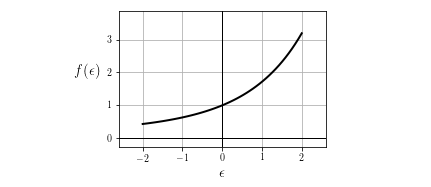

In [8]:
# create function
epsilon = np.linspace(-2,2)
f = (np.exp(epsilon) - 1)/epsilon

# reshape and package for plotter
epsilon.shape = (len(epsilon),1)
f.shape = (len(f),1)
f_table = np.concatenate((epsilon,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$\epsilon$',ylabel = '$f(\epsilon)$',rotate_ylabel=0)

#### <span style="color:#a50e3e;">Example 5. </span> Derivative the natural logarithm 

For this example we must use several properties of the (natural) logarithm - that is log the Euler base $e$ = 2.2.71828... - which include the following for positive constants $a$ and $b$


\begin{equation}
\text{log}(a)-\text{log}(b) = \text{log}\left(\frac{a}{b}\right)
\end{equation}


\begin{equation}
\cdot \text{log}(b) = \text{log}(b^a)
\end{equation}


In addition we need to use one particular definition of Euler's constant

\begin{equation}
\underset{\epsilon\rightarrow0}{\text{lim}} \,\,\left(1 + \epsilon \right)^{\frac{1}{\epsilon}} = e 
\end{equation}

(which can be verified by examining the plot of $f(\epsilon ) =\left(1 + \epsilon \right)^{\frac{1}{\epsilon}}$ in the printout of the next Python cell) and what follows in general that

\begin{equation}
\left(1 + \epsilon w \right)^{\frac{1}{\epsilon}} = e^w 
\end{equation}


as $\epsilon$ becomes infinitely small.

Finally we need the fact that the natural log and $e$ are inverses of one another, e.g., that $\text{log}(e^w) = w$

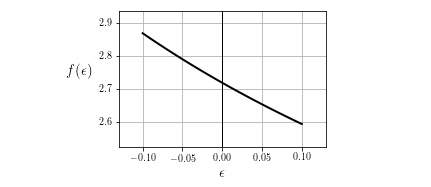

In [9]:
# create function
epsilon = np.linspace(-0.1,0.1)
f = (1 + epsilon)**(1/epsilon)

# reshape and package for plotter
epsilon.shape = (len(epsilon),1)
f.shape = (len(f),1)
f_table = np.concatenate((epsilon,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$\epsilon$',ylabel = '$f(\epsilon)$',rotate_ylabel = 0)

With these facts in mind and $g(w) = \text{log}(w)$ we have from the definition of the derivative we have 

\begin{equation}
\frac{\text{log}(w + \epsilon) - \text{log}(w)}{\epsilon} = \frac{\text{log}(\frac{w+\epsilon}{w})}{\epsilon} = \frac{\text{log}(1 + \frac{\epsilon}{w})}{\epsilon}= \text{log}((1 + \frac{\epsilon}{w})^\frac{1}{\epsilon})\end{equation}


And $\epsilon$ becomes infinitely small, using the definition of $e$, we have that the above

\begin{equation}
=\text{log}(e^\frac{1}{w}) = \frac{1}{w} = \frac{\mathrm{d}}{\mathrm{d}w}g(w)
\end{equation}

#### <span style="color:#a50e3e;">Example 6. </span> Derivative of sine

Using the 'double angle' rule $\text{sin}(a + b) = \text{sin}(a)\text{cos}(b) + \text{cos}(a)\text{sin}(b)$ we can write

\begin{equation}
\frac{\text{sin}(w + \epsilon) - \text{sin}(w)}{\epsilon} = \frac{\text{sin}(w)\text{cos}(\epsilon) + \text{cos}(w)\text{sin}(\epsilon) - \text{sin}(w)}{\epsilon}
\end{equation}


and re-arranging this we have that

\begin{equation}
= \text{sin}(w)\frac{(\text{cos}(\epsilon) - 1)}{\epsilon} + \text{cos}(w)\frac{\text{sin}(\epsilon)}{\epsilon} = \text{cos}(w)
\end{equation}

where the final equality follows from the facts that if we denote $f_1(\epsilon) = \frac{\text{cos}(\epsilon) - 1}{\epsilon}$  and  $f_2(\epsilon) = \frac{\text{sin}(\epsilon)}{\epsilon}$ then $f_1(\epsilon) = 0$ and $f_2(\epsilon) = 1$ as can be verified by examining the plot of each of these functions in the printout of the next Python cell. 

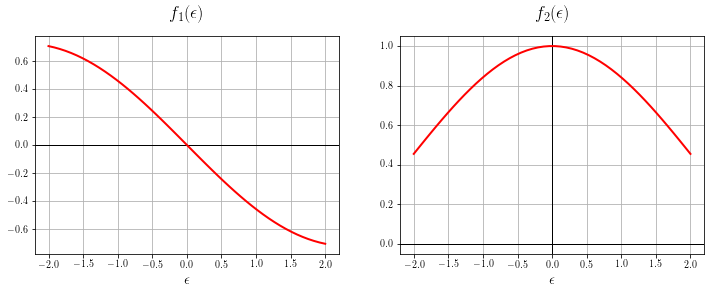

In [10]:
# create function
epsilon = np.linspace(-2,2)
f_1 = (np.cos(epsilon) - 1)/epsilon
f_2 = (np.sin(epsilon))/epsilon

# reshape and package for plotter
epsilon.shape = (len(epsilon),1)
f_1.shape = (len(f_1),1)
f_2.shape = (len(f_2),1)
f_1_table = np.concatenate((epsilon,f_1),axis=1)
f_2_table = np.concatenate((epsilon,f_2),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.double_plot(table1 = f_1_table,table2 = f_2_table,xlabel = '$\epsilon$',ylabel_1 = '$f_1(\epsilon)$',ylabel_2 = '$f_2(\epsilon)$')

#### <span style="color:#a50e3e;">Example 7. </span> Scalar multiplication rule

If $c$ is just a constant, then we have from the definition of the derivative $\frac{\mathrm{d}}{\mathrm{d} w}\left(c \cdot g(w)\right)$ that we can simply factor the constant out, giving

\begin{equation}
 \frac{c\cdot g(w + \epsilon) - c\cdot g(w)}{\epsilon} = c \cdot\frac{g(w + \epsilon) - g(w)}{\epsilon} 
\end{equation}

and as $\epsilon$ vanishes the right hand side is precisely $c\cdot\frac{\mathrm{d}}{\mathrm{d} w} g(w)$

#### <span style="color:#a50e3e;">Example 8. </span> Addition rule

To show that the derivative of a sum is the sum of individual derivatves, we start by computing the derivative of $\frac{\mathrm{d}}{\mathrm{d}w}\left(f(w) + g(w) \right)$ for small $\epsilon$, and simply rearrange terms as 

$$
\frac{\left(f(w + \epsilon) + g(w + \epsilon)\right) - \left(f(w) + g(w)\right)}{\epsilon} 
$$

\begin{equation}
= \frac{f(w + \epsilon) - f(w)}{\epsilon}  + \frac{g(w + \epsilon) - g(w)}{\epsilon} 
\end{equation}

with the latter being precisely $\frac{\mathrm{d}}{\mathrm{d}w}f(w) + \frac{\mathrm{d}}{\mathrm{d}w}g(w)$

#### <span style="color:#a50e3e;">Example 9. </span> Product rule

With two functions $f(w)$ and $g(w)$ the definition of the derivative for small magnitude $\epsilon$ gives

\begin{equation}
\frac{f(w + \epsilon)g(w + \epsilon) - f(w)g(w)}{\epsilon} 
\end{equation}


Adding and subtracting $f(w+\epsilon)g(w)$ (equals zero)

\begin{equation}
=\frac{f(w + \epsilon)g(w + \epsilon) - f(w + \epsilon)g(w) + f(w+\epsilon)g(w) - f(w)g(w)}{\epsilon} \end{equation}


\begin{equation}
=\frac{f(w + \epsilon) - f(w)}{\epsilon}\,g(w) \, \,+ \,\, f(w + \epsilon)\,\frac{g(w + \epsilon) - g(w)}{\epsilon}
\end{equation}


Then as $\epsilon \longrightarrow 0$ we have that

$\begin{align}
f(w + \epsilon) \longrightarrow f(w)~~~~~~\\ 
\frac{f(w + \epsilon) - f(w)}{\epsilon}\longrightarrow \frac{\mathrm{d}}{\mathrm{d}w}f(w)  \\
\frac{g(w + \epsilon) - g(w)}{\epsilon}\longrightarrow \frac{\mathrm{d}}{\mathrm{d}w}g(w)  \\
\end{align}$

And so all together then the above gives $\frac{\mathrm{d}}{\mathrm{d}w}f(w)\cdot g(w) + f(w)\cdot\frac{\mathrm{d}}{\mathrm{d}w}g(w)$

#### <span style="color:#a50e3e;">Example 10. </span> Chain rule

With two functions $f(w)$ and $g(w)$ lets look at the composition $f(g(w))$ and compute its derivative $\frac{\mathrm{d}}{\mathrm{d}w}(f(g(w)))$ at a general input $w$.  For small magnitude $\epsilon$ the definition of the derivative gives


\begin{equation}
\frac{f(g(w + \epsilon)) - f(g(w))}{\epsilon} = \frac{f(g(w + \epsilon)) - f(g(w))}{g(w + \epsilon) - g(w)} \cdot \frac{g(w + \epsilon) - g(w)}{\epsilon} 
\end{equation}

As $\vert{\epsilon}\vert \longrightarrow 0$ the left hand side above becomes $\frac{\mathrm{d}}{\mathrm{d}w}(f(g(w)))$, but so too does $g(w + \epsilon) - g(w) \longrightarrow 0 $ and on the right side we have that 

\begin{equation}
\frac{f(g(w + \epsilon)) - f(g(w))}{g(w + \epsilon) - g(w)} \longrightarrow \frac{\mathrm{d}}{\mathrm{d}g}f(g)
\end{equation}


$\,\,\,$
\begin{equation}
~~~~~~~~~~~\frac{g(w + \epsilon) - g(w)}{\epsilon} \longrightarrow \frac{\mathrm{d}}{\mathrm{d}w}g(w)
\end{equation}


Therefore all together we have that

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}(f(g(w)))= \frac{\mathrm{d}}{\mathrm{d}g}f(g) \cdot \frac{\mathrm{d}}{\mathrm{d}w}g(w)\
\end{equation}